# 1. Importing Libraries

In [322]:
#import quandl (depricated)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 2. Importing Data

### Note to Tutor

Hi Paras,

After re-installing the nasdaq-data-link package and following the below instructions:
- https://github.com/Nasdaq/data-link-python/#local-api-key-environment-variable
- https://packaging.python.org/en/latest/tutorials/installing-packages/
- https://docs.data.nasdaq.com/docs/python-installation

I'm still not able to connect to the QDL/ODA or any other data set via API. 
Therefore, I'm going to use the CSV download of the data set.

FYI: The command has changed from **'quandl'** to **'nasdaqlink'** which might be worth **updating in the course material**.

In [10]:
# Configure API key 
# Qandl changed to nasdaq-data-link, therefore the command has changed as well

import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = '...'

# Depricated: import quandl
# Depricated: quandl.ApiConfig.api_key = '...'

In [20]:
# IMF Cross Country Macroeconomic Statistics (QDL/ODA_IND_PCPIPCH)


import nasdaqdatalink
data = nasdaqdatalink.get('QDL/ODA')


# Filter by a single date and indicator
# Depricated: data = quandl.get('QDL/ODA',date='2028-12-31', indicator='IND_PCPIPCH')

# Inflation % change, Average Consumer Prices: PCPIPCH
# data = nasdaqdatalink.get('QDL/ODA', indicator='IND_PCPIPCH')

# Unemployment Rate, % of Total Labor Force: LUR
# data = nasdaqdatalink.get('QDL/ODA', indicator='IND_LUR')

# Nasdaqdatalink.ApiConfig.api_key = ...
# Nasdaqdatalink.get_table('QDL/ODA',date='2028-12-31', indicator='IND_PCPIPCH')

DataLinkError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@data.nasdaq.com.

In [51]:
# Debugging

import requests

api_key = "qYsxYnvgew2ipkzVxUxv"
url = f"data.nasdaq.com/api/v3/datasets/QDL/ODA.json?api_key={api_key}"
# url = "https://data.nasdaq.com/api/v3/datasets/FRED/NROU.json?api_key=..."

response = requests.get(url)

print("Status Code:", response.status_code)
print("Response Text:", response.text) # This will show the actual response

MissingSchema: Invalid URL 'data.nasdaq.com/api/v3/datasets/QDL/ODA.json?api_key=...': No scheme supplied. Perhaps you meant https://data.nasdaq.com/api/v3/datasets/QDL/ODA.json?api_key=...?

### Note to Tutor

Hi Paras,

After re-installing the nasdaq-data-link package and following the below instructions:
- https://github.com/Nasdaq/data-link-python/#local-api-key-environment-variable
- https://packaging.python.org/en/latest/tutorials/installing-packages/
- https://docs.data.nasdaq.com/docs/python-installation

I'm still not able to connect to the QDL/ODA or any other data set via API. 
Therefore, I'm going to use the CSV download of the data set.

FYI: The command has changed from **'quandl'** to **'nasdaqlink'** which might be worth **updating in the course material**.

In [42]:
# Importing data set zomato_numeric.csv
df_time_series = pd.read_csv(r'/Users/I589637/Documents/Zomato Analysis/02 - Data/Original Data/QDL_ODA.csv', index_col = False)

In [44]:
df_time_series

,indicator,date,value
0,USA_NGDP_D,1980-12-31,42.246
1,USA_NGDP_D,1981-12-31,46.243
2,USA_NGDP_D,1982-12-31,49.100
3,USA_NGDP_D,1983-12-31,51.023
4,USA_NGDP_D,1984-12-31,52.865
...,...,...,...
504107,EU_PWOOLW,2024-12-31,NaN
504108,EU_PWOOLW,2025-12-31,NaN
504109,EU_PWOOLW,2026-12-31,NaN
504110,EU_PWOOLW,2027-12-31,NaN


In [48]:
df_time_series.shape

(504112, 3)

In [62]:
df_time_series.columns

Index(['indicator', 'date', 'value'], dtype='object')

In [78]:
df_time_series_value

,value
date,
1980-12-31,42.246
1981-12-31,46.243
1982-12-31,49.100
1983-12-31,51.023
1984-12-31,52.865
...,...
2024-12-31,NaN
2025-12-31,NaN
2026-12-31,NaN


In [82]:
type(df_time_series_value)

pandas.core.frame.DataFrame

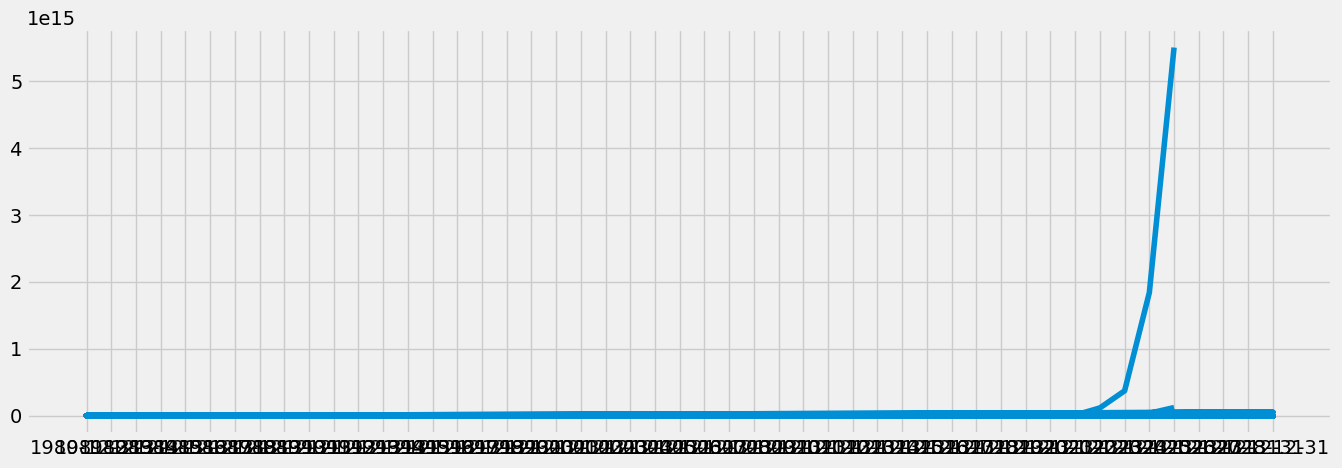

In [84]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_time_series_value)

# 3. Subsetting, Wrangling, Cleaning the Data

In [201]:
# Subset all records with the indicator "IND_LUR" (Country = India ; Unemployment Rate, % of Total Labor Force = LUR)
df_ind_unemployment = df_time_series[df_time_series['indicator'] == 'IND_LUR']

# Display the resulting DataFrame
print(df_ind_unemployment.head())

       indicator        date  value
361914   IND_LUR  1980-12-31    NaN
361915   IND_LUR  1981-12-31    NaN
361916   IND_LUR  1982-12-31    NaN
361917   IND_LUR  1983-12-31    NaN
361918   IND_LUR  1984-12-31    NaN


In [203]:
# Transform "date" to index and drop unnecessary columns

df_ind_unemployment_value = df_time_series.set_index('date')[['value']]

In [205]:
df_ind_unemployment_value

,value
date,
1980-12-31,42.246
1981-12-31,46.243
1982-12-31,49.100
1983-12-31,51.023
1984-12-31,52.865
...,...
2024-12-31,NaN
2025-12-31,NaN
2026-12-31,NaN


In [207]:
# Drop rows where 'value' is NaN
df_ind_unemployment_value_cleaned = df_ind_unemployment_value.dropna(subset=['value'])

In [209]:
df_ind_unemployment_value_cleaned

,value
date,
1980-12-31,42.246
1981-12-31,46.243
1982-12-31,49.100
1983-12-31,51.023
1984-12-31,52.865
...,...
2024-12-31,99.193
2025-12-31,99.193
2026-12-31,99.193


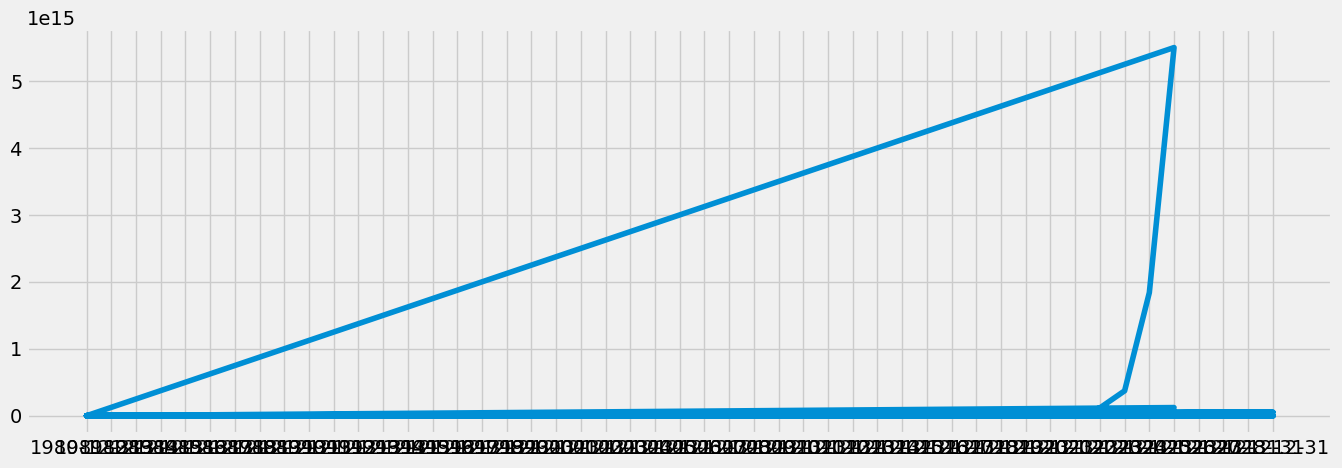

In [211]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_ind_unemployment_value_cleaned)

In [213]:
# Reset index so that we can use the "Date" column as a filter

df_ind_unemployment_value_cleaned = df_ind_inflation_value_cleaned.reset_index()

In [215]:
df_ind_unemployment_value_cleaned

,index,date,value
0,0,1980-12-31,42.246
1,1,1981-12-31,46.243
2,2,1982-12-31,49.100
3,3,1983-12-31,51.023
4,4,1984-12-31,52.865
...,...,...,...
338080,338080,2024-12-31,99.193
338081,338081,2025-12-31,99.193
338082,338082,2026-12-31,99.193
338083,338083,2027-12-31,99.193


In [217]:
# Filter timeframe from 1980s to 2019 (Before Covid)

df_subset = df_ind_unemployment_value_cleaned.loc[(df_ind_unemployment_value_cleaned['date'] >= '1980-01-01') & (df_ind_unemployment_value_cleaned['date'] <= '2019-12-31')]

In [219]:
df_subset

,index,date,value
0,0,1980-12-31,42.246
1,1,1981-12-31,46.243
2,2,1982-12-31,49.100
3,3,1983-12-31,51.023
4,4,1984-12-31,52.865
...,...,...,...
338071,338071,2015-12-31,90.992
338072,338072,2016-12-31,100.000
338073,338073,2017-12-31,117.976
338074,338074,2018-12-31,149.441


In [221]:
df_subset.shape

(267174, 3)

In [223]:
# Set the "date" column as the index

from datetime import datetime

df_subset['datetime'] = pd.to_datetime(df_subset['date']) # Create a datetime column from "date.""
df_subset = df_subset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_subset.drop(['date'], axis=1, inplace=True) # Drop the "date" column.
df_subset.head()

,index,value
datetime,,
1980-12-31,0,42.246
1981-12-31,1,46.243
1982-12-31,2,49.100
1983-12-31,3,51.023
1984-12-31,4,52.865


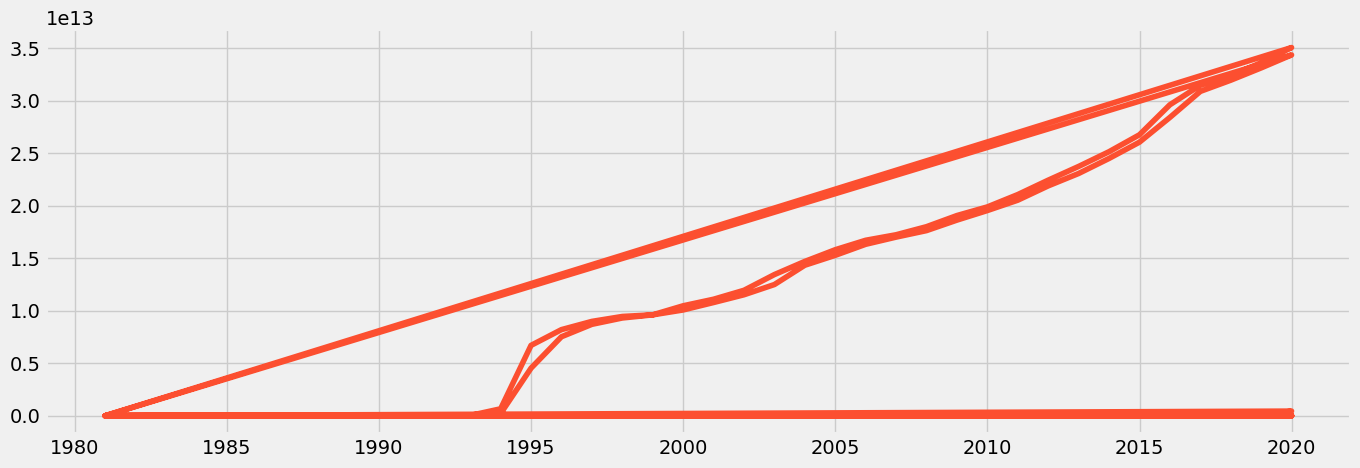

In [225]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_subset)

### **Interpretation:**

The presence of multiple lines instead of a single line representing the unemployment rate over time, could be due to one of the following reasons:

1. **Multiple Series in DataFrame**:
   - The `plot` method is plotting multiple columns or series from the DataFrame simultaneously. If `df_subset` contains more than one column aside from the "datetime" and "value" columns (like separate indicators, different geographical areas, or subcategories), each will be plotted as a separate line by default.

2. **Duplicated Data**:
   - Another possibility is that there are duplicate rows in the DataFrame, or it inadvertently contains multiple series or versions of the same data, possibly due to oversights in data preparation or merging operations.

3. **Unintended Indexing**:
   - If the DataFrame indexing or slicing operation leads to unintended inclusion of multiple series or aggregate figures, it may cause multiple lines to appear instead of a single unemployment rate measure.

4. **Aggregation or Grouping**:
   - The plot might reflect grouped data where the lines represent different aggregation levels, like mean, median, or other statistical measures over various periods.

In [228]:
#Simple Check
df_subset.describe()

,index,value
count,267174.000000,2.671740e+05
mean,169676.688039,3.637605e+09
std,97688.913415,2.858102e+11
min,0.000000,-1.226744e+06
25%,85844.250000,1.423000e+00
50%,169312.500000,1.697150e+01
75%,255020.750000,1.450185e+02
max,338075.000000,3.505646e+13


In [230]:
# check for multiple columns

df_subset.columns

Index(['index', 'value'], dtype='object')

In [232]:
# check for duplicate data

# Find duplicates
duplicates = df_subset[df_subset.duplicated()]

# Display duplicates
print(duplicates)

Empty DataFrame
Columns: [index, value]
Index: []


In [234]:
# remove rows where both "datetime" and "value" are duplicated

# Remove duplicate rows based on all columns
df_subset_cleaned = df_subset.drop_duplicates()

# Display the cleaned DataFrame
print(df_subset_cleaned)

             index    value
datetime                   
1980-12-31       0   42.246
1981-12-31       1   46.243
1982-12-31       2   49.100
1983-12-31       3   51.023
1984-12-31       4   52.865
...            ...      ...
2015-12-31  338071   90.992
2016-12-31  338072  100.000
2017-12-31  338073  117.976
2018-12-31  338074  149.441
2019-12-31  338075  132.626

[267174 rows x 2 columns]


In [236]:
# Check for missing values (you shouldn't have any)

df_subset_cleaned.isnull().sum() 

index    0
value    0
dtype: int64

In [238]:
#Simple Check
df_subset_cleaned.describe()

,index,value
count,267174.000000,2.671740e+05
mean,169676.688039,3.637605e+09
std,97688.913415,2.858102e+11
min,0.000000,-1.226744e+06
25%,85844.250000,1.423000e+00
50%,169312.500000,1.697150e+01
75%,255020.750000,1.450185e+02
max,338075.000000,3.505646e+13


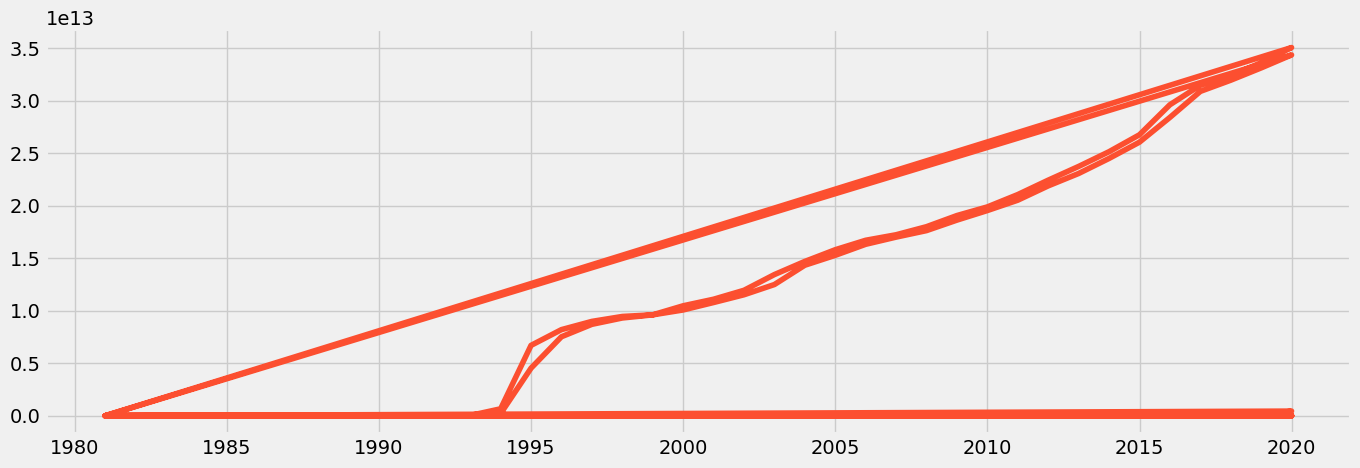

In [240]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_subset_cleaned)

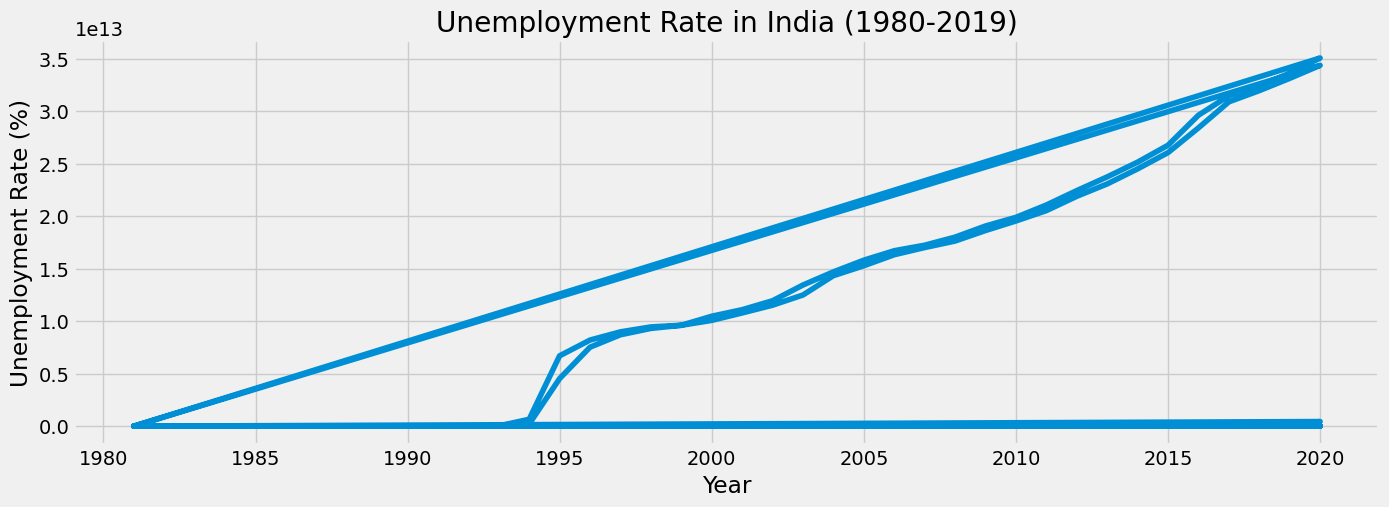

In [244]:
# Plot Without Automatic Resampling
# Sometimes plotting directly might invoke automatic resampling or aggregation. Verify this by plotting with clear time intervals:

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_subset_cleaned.index, df_subset_cleaned['value'])
plt.title('Unemployment Rate in India (1980-2019)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

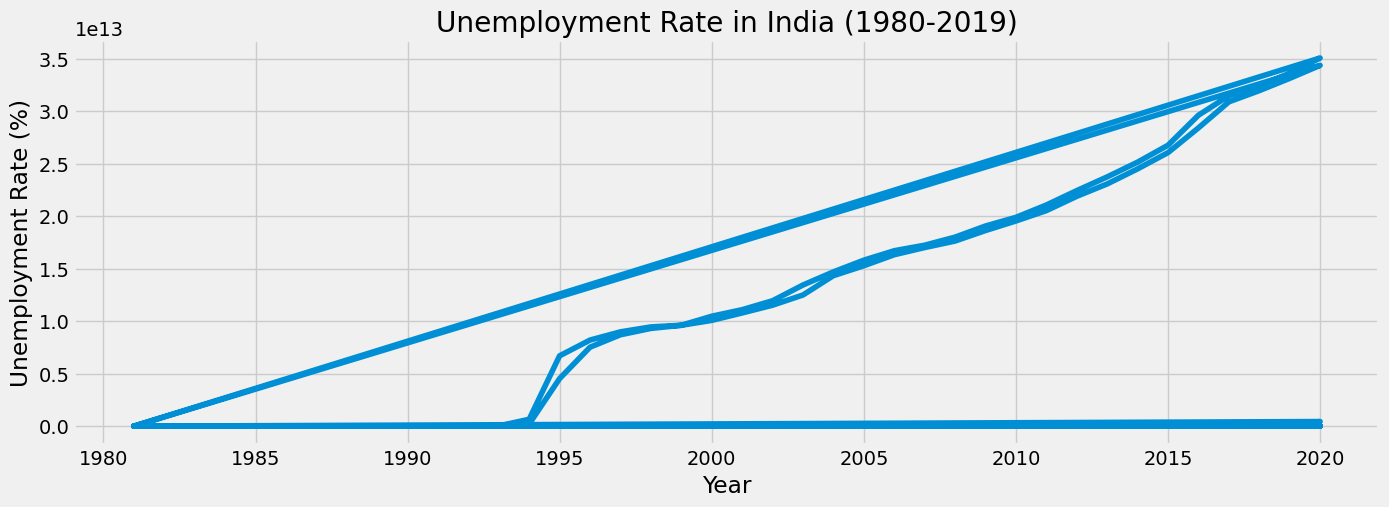

In [246]:
# Check for Scalability Issues:
# Ensure that matplotlib is not generating multiple lines due to scalability or resolution issues

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_subset_cleaned['value'])
plt.title('Unemployment Rate in India (1980-2019)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [248]:
# Check for duplicates in the 'datetime' column
duplicates_datetime = df_subset_cleaned[df_subset_cleaned.index.duplicated(keep=False)]

# Display duplicate rows based on 'datetime'
print(duplicates_datetime)

             index    value
datetime                   
1980-12-31       0   42.246
1981-12-31       1   46.243
1982-12-31       2   49.100
1983-12-31       3   51.023
1984-12-31       4   52.865
...            ...      ...
2015-12-31  338071   90.992
2016-12-31  338072  100.000
2017-12-31  338073  117.976
2018-12-31  338074  149.441
2019-12-31  338075  132.626

[267174 rows x 2 columns]


In [250]:
# Get unique values in the 'datetime' index
unique_datetimes = df_subset_cleaned.index.unique()

# Display all unique values
print(unique_datetimes)

# Count of all unique datetime values
count_unique_datetimes = unique_datetimes.size
print(f"Count of unique datetime values: {count_unique_datetimes}")

DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='datetime', freq=None)
Count of unique datetime values: 40


In [252]:
# save out subset for manual check
df_subset_cleaned.to_csv(os.path.join(r'/Users/I589637/Documents/Zomato Analysis/02 - Data/Prepared Data/ind_unemployment_cleaned.csv'))

In [262]:
# Group by the 'datetime' index and compute the mean for duplicate entries
df_reduced = df_subset_cleaned.groupby(df_subset_cleaned.index).median()

In [264]:
# Display the resulting DataFrame
df_reduced

,index,value
datetime,,
1980-12-31,170458.0,13.3290
1981-12-31,169479.0,12.1190
1982-12-31,169295.0,10.8260
1983-12-31,169296.0,10.6260
1984-12-31,169248.0,12.2500
1985-12-31,169273.5,11.2390
1986-12-31,169074.0,12.5620
1987-12-31,168780.5,13.5855
1988-12-31,168435.0,13.3990


In [266]:
# Round values in the 'value' column to 2 decimal places
df_reduced['value'] = df_reduced['value'].round(2)


In [268]:
df_reduced

,index,value
datetime,,
1980-12-31,170458.0,13.33
1981-12-31,169479.0,12.12
1982-12-31,169295.0,10.83
1983-12-31,169296.0,10.63
1984-12-31,169248.0,12.25
1985-12-31,169273.5,11.24
1986-12-31,169074.0,12.56
1987-12-31,168780.5,13.59
1988-12-31,168435.0,13.40


In [270]:
# Drop the 'index' column from the DataFrame
df_reduced = df_reduced.drop(columns=['index'])

# Display the updated DataFrame to ensure the column has been removed
print(df_reduced.head())

            value
datetime         
1980-12-31  13.33
1981-12-31  12.12
1982-12-31  10.83
1983-12-31  10.63
1984-12-31  12.25


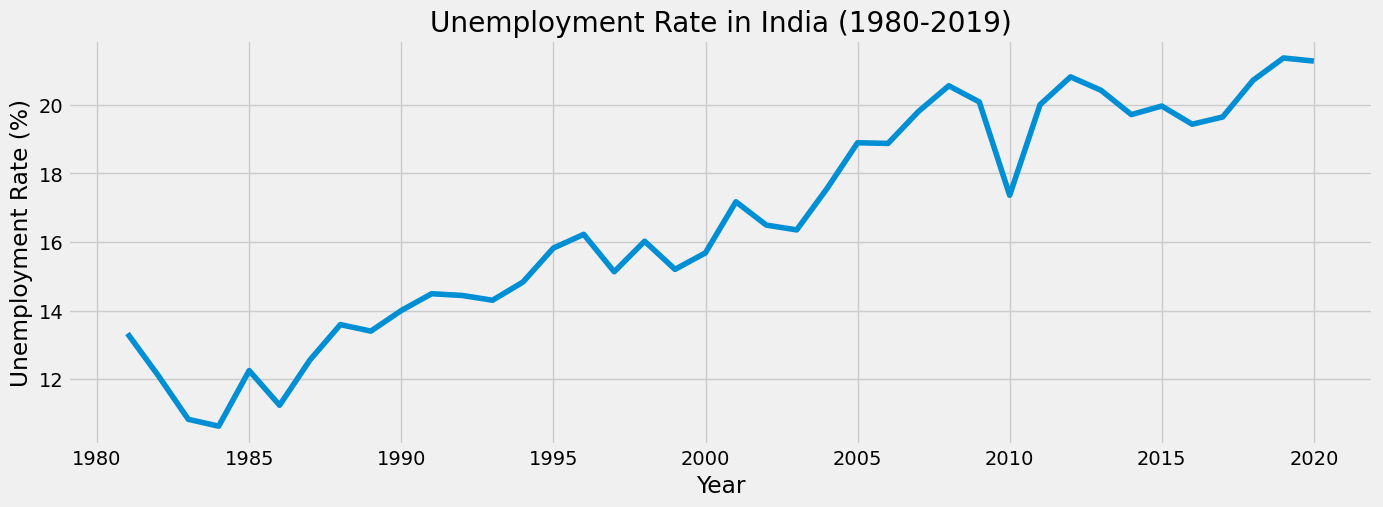

In [274]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.title('Unemployment Rate in India (1980-2019)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.plot(df_reduced)

### **Interpretation:**

1. **Early 1980s (Initial Dip)**:
Initially, there is a noticeable decline in the unemployment rate, indicating potential growth or stabilization in economic conditions. During this period, India was recovering from earlier economic struggles post-independence, with attempts to boost industrialization and agricultural output.

2. **Mid 1980s (Volatility)**:
The fluctuations from the mid-1980s represent political instability and changes in policy affecting economic conditions (e.g., short-term responses to internal fiscal challenges). Rajiv Gandhi’s tenure as Prime Minister saw attempts to liberalize and modernize India's economic policies, which likely influenced employment rates.

3. **Early 1990s (After 1991 Economic Liberalization)**:
A gradual increase in unemployment can be seen as India underwent significant economic transformations. In 1991, India faced a severe balance of payments crisis, leading to reforms that opened up the economy, including reducing restrictions on foreign investment and privatizing state-owned enterprises.

4. **1995-2005 (Economic Adjustment and Growth)**:
The unemployment rate seems to rise as India continues to grapple with socio-economic adjustments due to globalization impacts. This period witnessed rapid technological advancement, alongside IT sector growth, influencing job availability and type significantly, with some sectors not keeping pace.

5. **Post-2005 (Global Financial Crisis and Aftermath)**:
Economic conditions leading and post-2008 also influenced employment rates as India started facing challenges like inflation and fiscal deficits. Export-driven sectors and those reliant on foreign investment felt some pinch, although India was relatively insulated compared to Western nations.

6. **Recent Trends (2010s–2019)**:
Toward the end of the timeframe, a series of economic policies and structural changes including demonetization (2016) and shifts in taxation (e.g., GST implementation) potentially influenced economic activities across informal and formal sectors, affecting employment patterns.


#### **Socioeconomic Considerations:**

**Demographic Changes**:
India’s vast population growth adds pressure on employment rates, as an ever-growing labor force requires consistent job creation strategies and adjustment mechanisms to accommodate new entrants.

**Sectoral Shifts**:
Shifts from agriculture to industry, and later to services, characterize employment patterns. The rise of the IT and service sectors has created opportunities, but disparities exist in achieving equitable job distribution across different societal levels.


### **Conclusion:**
This graph suggests a gradually worsening unemployment situation in India over the selected period. However, further contextual insight into data collection methodologies, underlying economic indicators, and specific policy impacts would enhance the understanding of these trends more comprehensively.

# 4. Time-Series Analysis: Decomposition

In [280]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_reduced, model='additive')

In [282]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

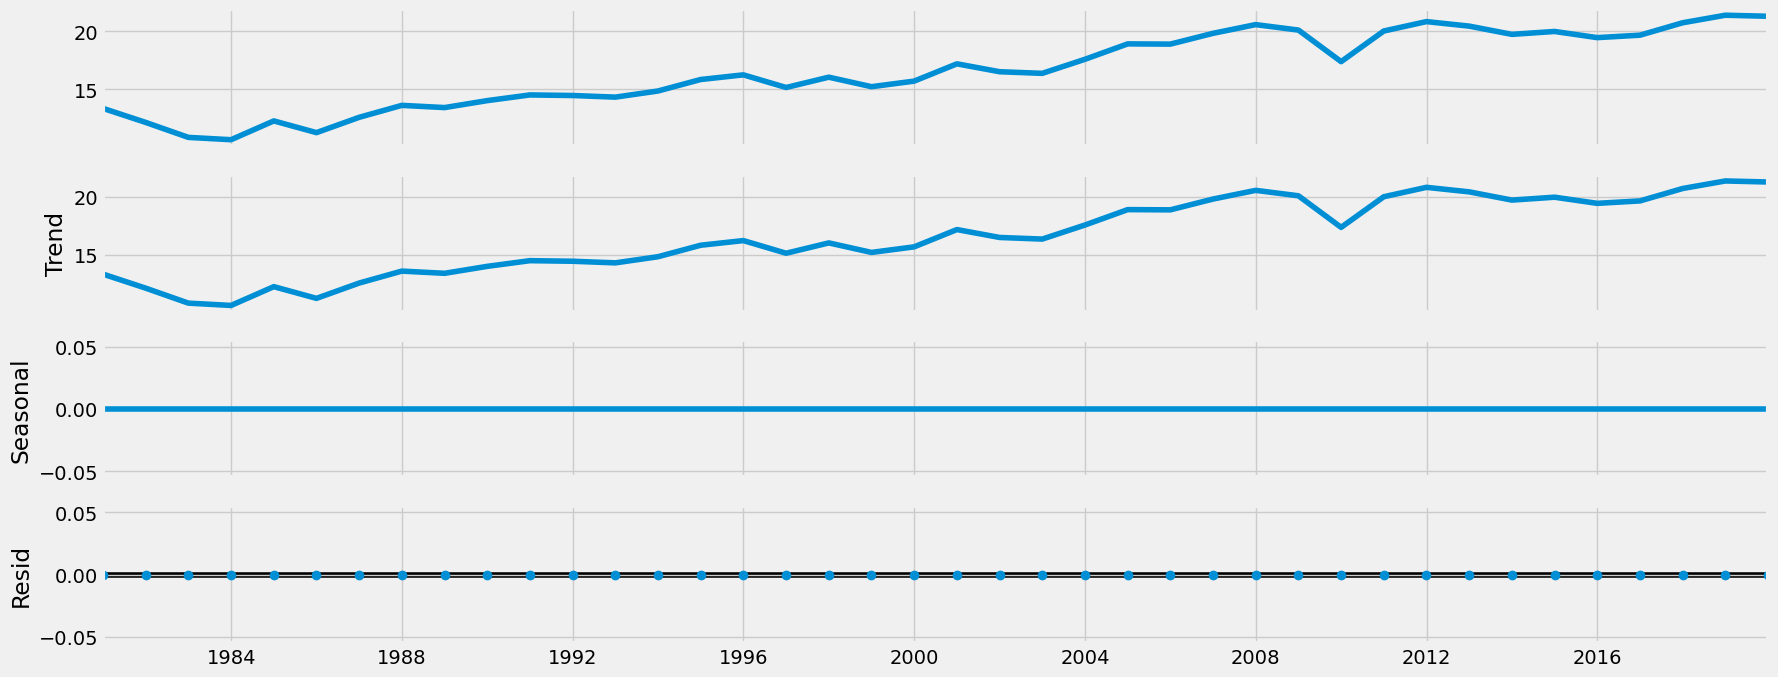

In [284]:
# Plot the separate components

decomposition.plot()
plt.show()

In [287]:
# Decompose the time series using an additive model

decomposition_m = sm.tsa.seasonal_decompose(df_reduced, model='multiplicative')

In [289]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

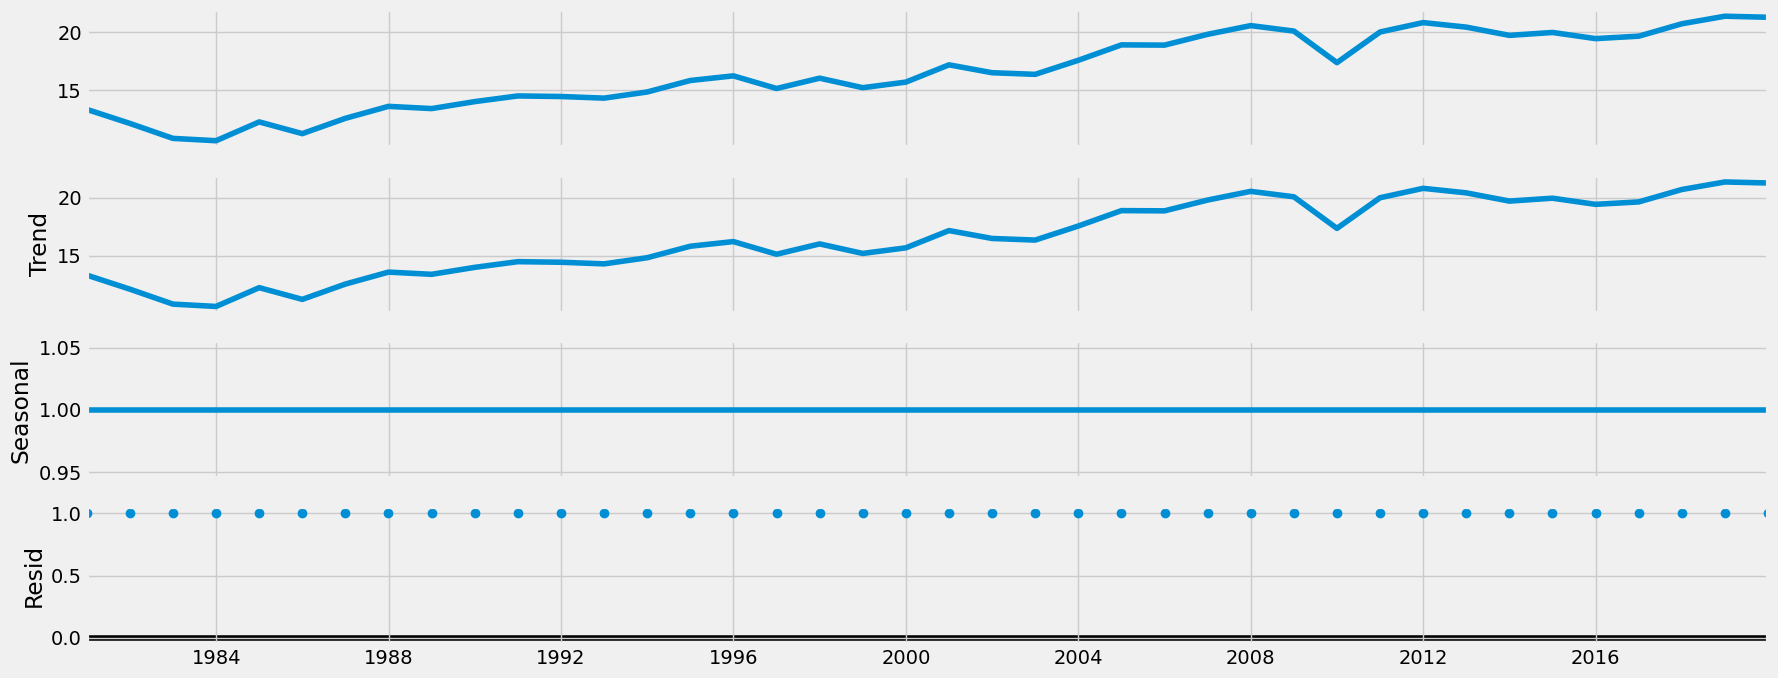

In [291]:
# Plot the separate components

decomposition_m.plot()
plt.show()

## **Interpretation:**

#### **Trend Component:**

**Description**:
The trend line represents the underlying long-term progression of unemployment rates over time, smoothing out short-term fluctuations. It indicates a general upward movement throughout the period with occasional dips and recoveries.

**1980s to Early 1990s**: The initial decline in the trend suggests a period of adjustment and potential stabilization before the impacts of economic reforms.

**Post-1991 Economic Reforms**: The trend reflects a gradual increase as India adjusted to new economic systems, possibly influenced by structural changes from liberalization and globalization.

**2000s and Beyond**: Continued upward movement suggests that despite sectoral growth, challenges remain in creating proportional employment opportunities amidst a rapidly growing labor force.

#### **Seasonal Component:**

**Description**:
The seasonal component captures systematic periodic fluctuations within each year. However, the plot shows no visible seasonal variation, indicating that unemployment rates in India do not exhibit regular seasonal patterns within this timeframe.

**Absence of Seasonal Pattern**: This suggests that any fluctuations in unemployment rates are not driven by predictable seasonal factors. Unemployment is potentially more influenced by broader macroeconomic or policy-related cycles rather than seasonal economic activities like agriculture or festival-related hiring.

#### **Residual Component:**

**Description**:
The residual component outlines random disturbances, noise, or irregular patterns not explained by the trend or seasonal components. As depicted, it remains consistently small with little visible variation.

**Minimal Irregular Variations**: The consistent nature of residuals suggests that most fluctuations in unemployment are absorbed within the trend aspect, indicating relatively stable responses to unexpected events (natural disasters, political unrest, etc.) within the analyzed period.

### Overall Impact

**Long-term Growth**: This decomposition indicates that India’s unemployment dynamics over the decades are shaped primarily by trend-driven influences, tied to long-term economic policies, structural transformation, and demographic shifts.

**Policy Implications**: Continuous upward trends motivate further economic reforms to curtail unemployment amidst rising population demands. Development strategies must address labor market mismatches and promote sustainable job creation across diverse economic sectors.

**Sectoral Considerations**: While the lack of seasonal variation might imply a somewhat stable labor market unaffected by regular cycles, it underscores the importance of understanding specific economic contexts impacting employment beyond traditional sector-linked fluctuations.

# 5. Testing For Stationarity

In [297]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_reduced['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.779218
p-value                         0.825151
Number of Lags Used             2.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


## **Interpretation:**

1. **Test Statistic: -0.779218**:
The test statistic is a calculated value that, along with critical values, helps determine if the time series is stationary. In this case, the test statistic is quite high (close to zero), suggesting non-stationarity.

2. **p-value: 0.825151**:
The p-value indicates the probability of observing the test statistic under the null hypothesis (that the data is not stationary). A high p-value (usually above 0.05) suggests that there is not enough evidence to reject the null hypothesis. Here, the p-value is 0.825151, which is significantly higher than 0.05, strongly suggesting non-stationarity.

3. **Critical Values**:
- **1%: -3.620918**
- **5%: -2.943539**
- **10%: -2.610400**

The critical values represent thresholds at different significance levels. For the test statistic to indicate stationarity, it typically needs to be lower (more negative) than these critical values. Here, the test statistic of -0.779218 is much higher than all critical values, aligning with the conclusion that the data is non-stationary.

4. **Number of Lags Used: 2**:
This denotes the number of lags used in the autoregression model to perform the test, which can affect the test's accuracy and sensitivity to detect stationarity.

5. **Number of Observations Used: 37**:
Indicates the total observations considered in conducting the test, which might be the entire available dataset for these years.

## **Conclusion:**

Based on the Dickey-Fuller test results:

**Non-Stationary**: The unemployment rate data is non-stationary, meaning its mean and variance change over time. This is consistent with a dataset that reflects evolving socio-economic conditions and economic reforms over the years.

**Data Transformation**: Before applying statistical models that assume stationarity (like ARIMA), it might be necessary to transform the data.

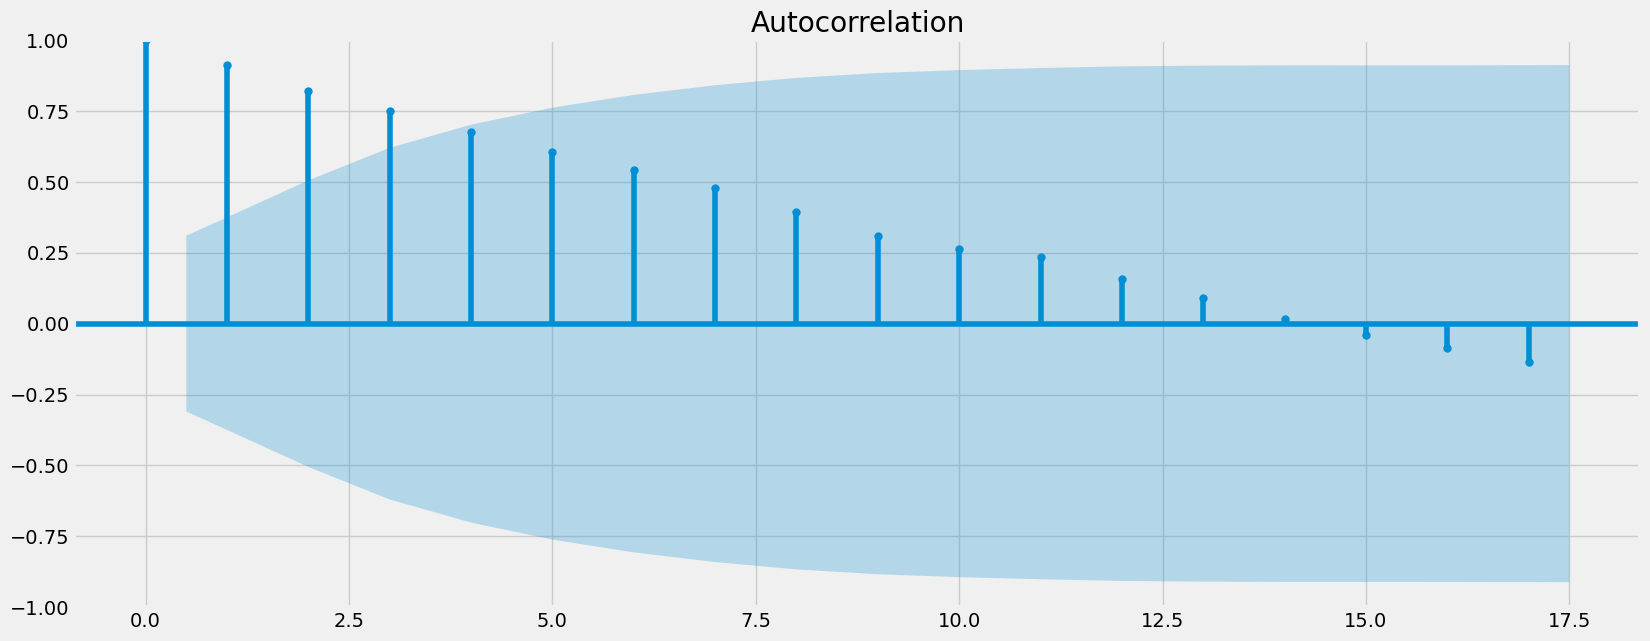

In [301]:
# plot autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import the autocorrelation and partial correlation plots

plot_acf(df_reduced)
plt.show()

## **Interpretation:**

1. **Autocorrelation at Different Lags**:
- The y-axis represents the correlation coefficient, while the x-axis represents the number of lags.
- High positive values at initial lags indicate that the time series has significant correlations with its immediate past values.

2. **Significance Level**:
- The blue shaded area denotes the confidence intervals within which random correlations due to noise are expected to reside. Bars extending beyond this shaded area indicate statistically significant autocorrelations.
- ACF spikes seen above and beyond the confidence interval lines are statistically significant, suggesting dependence between observations at corresponding lags.

3. **Pattern Overview**:
- The visible decay in the autocorrelation values as the lag increases (though not disappearing quickly) suggests a slow decline in autocorrelation strength, indicative of a long-lasting impact of past values on future values.
- This often characterizes non-stationary series, aligning with earlier findings from the Dickey-Fuller test.

4. **Possible Implications**:
- **Model Appropriateness**: The persistent autocorrelations suggest the potential use of ARIMA models where these correlations can be utilized for forecasting.
- **Response to Reforms/Events**: Systematic impacts (e.g., economic reforms) likely influence unemployment over multiple periods, reinforcing observation dependencies.


#### **Socioeconomic Context:**

**Lagged Economic Responses**: India’s economic policies and transformations could lead to delayed and sustained effects on labor markets, seen through extended autocorrelations.

**Structural Shifts**: Increases in unemployment rates tied to socio-economic changes often show persistent correlations, reflecting prolonged impacts over years.


## **Conclusion:**

This ACF plot highlights that India's unemployment rate has significant autocorrelation across several lags, suggesting dependence to past values extending over time. For statistical modeling or forecasting, this behavior underscores the necessity to account for this autocorrelation to effectively predict or interpret future unemployment trends.

# 6. Stationarizing The Data

In [305]:
data_diff = df_reduced - df_reduced.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [307]:
data_diff.dropna(inplace = True) # Here, we remove the missing values that came about as a result of the differencing. 
# We need to remove these or we won't be able to run the Dickey-Fuller test.

In [309]:
data_diff

,value
datetime,
1981-12-31,-1.21
1982-12-31,-1.29
1983-12-31,-0.20
1984-12-31,1.62
1985-12-31,-1.01
1986-12-31,1.32
1987-12-31,1.03
1988-12-31,-0.19
1989-12-31,0.60


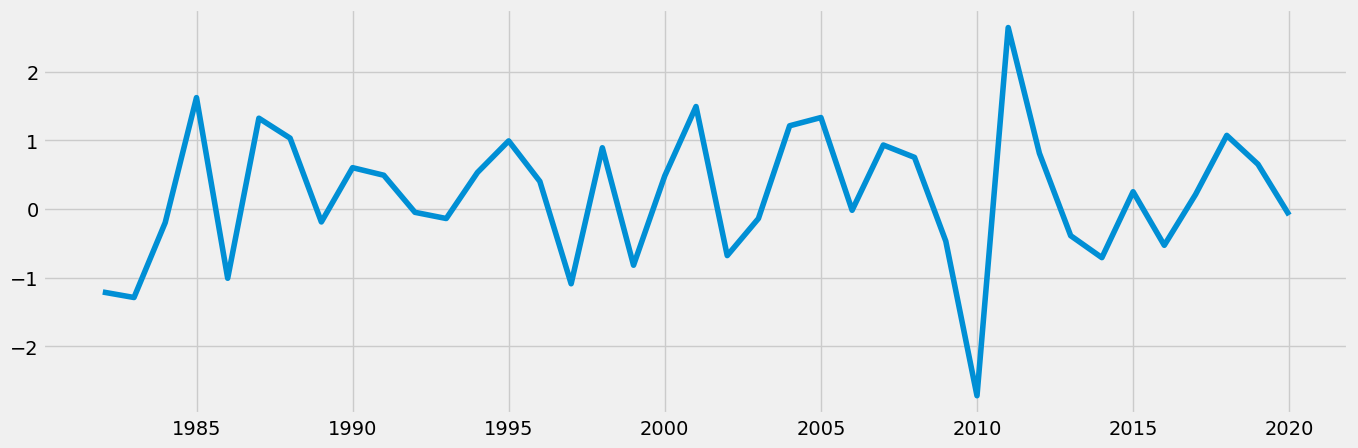

In [311]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

## **Interpretation:**

1. **Removal of Long-Term Trends**:
- The stationarized plot displays fluctuations around a mean rather than showing a trending behavior, suggesting that any long-term upward or downward drift has been neutralized.
- The original non-stationarity (trend) that showed persistent growth is not present, illustrating success in achieving stationarity.

2. **Enhanced Short-Term Volatility**:
- Post-stationarization, the plot highlights short-term variations more prominently. Peaks and troughs represent local highs and lows in unemployment rates.
- This volatility could reflect immediate responses to socio-economic policies or events within shorter timelines as opposed to prolonged structural shifts.

3. **Consistency Over Time**:
The data now fluctuates around zero, exhibiting a stable variance over time. This demonstrates that stationarization has achieved a consistent statistical property, typically needed for certain predictive methodologies like ARIMA.

4. **Impactful Episodes**:
Notable peaks or drops, such as the sharp decline around 2010, may be affiliations to specific disruptive events or policies (e.g., global financial crisis impacts and domestic policy impositions), revealing actionable insights post-stationarization.


#### **Socioeconomic Context:**

**Short-Term Economic Influences**:
Focus now shifts to understanding how comparatively shorter-term economic policies or shocks correlate with unemployment changes within this stable framework. This might include election cycles, budgetary decisions, and key economic reforms.

**Modeling Potential**:
With stationarized data, regression models, and forecasting tools that assume stationary inputs offer improved accuracy and reliability, enabling better predictive capacities and decision-making reflections given the stable mean and variance.


## **Conclusion:**

The stationarized time series plot provides an analysis lens focused on periodic and impactful fluctuations rather than long-term trends. By stationarizing, analysts can better model and understand short-term dependencies, allowing economic historians and policy makers to pinpoint effective interventions and strategic planning tailored to manage these short-term dynamics in the unemployment figures of India over time.

In [316]:
# Running the Dickey-Fuller test again

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.994945e+00
p-value                        7.575884e-10
Number of Lags Used            1.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


## **Interpretation:**

1. **Test Statistic: -6.994945**:
This highly negative test statistic indicates a strong rejection of the null hypothesis of non-stationarity. Compared to the previous test statistic, this value is significantly lower, suggesting the data has been effectively stationarized.

2. **p-value: 7.575884e-10**:
The extremely low p-value strongly supports the stationarity assumption. With a value close to zero, you can confidently reject the null hypothesis and conclude that the time series is stationary after appropriate differencing or transformations.

3. **Critical Values**:
- **1%: -3.620918**
- **5%: -2.943539**
- **10%: -2.610400**

The test statistic is much lower than all critical values, reinforcing the conclusion that the time series is stationary. This supports reliable modeling prospects using tools that assume stationarity.

4. **Additional Observations**:

**Number of Lags Used: 1**:
A single lag was used to assess stationarity, indicating parsimonious modeling aiming for simplicity while achieving statistical reliability.

**Number of Observations Used: 37**:
Continues to utilize the entire dataset, which ensures consistency in statistical testing across original and stationarized contexts.


## **Conclusion:**

**Stationarity Achievement**:
The application of differencing or relevant transformation has successfully rendered the unemployment rate data stationary, making it appropriate for further time series modeling and analysis.

**Modeling Efficacy**:
These results pave the way for econometric models such as ARIMA, enabling more accurate forecasting and insight generation pertinent to examining short-term fluctuations in unemployment rates given past data.

**Policy and Analytical Implications**:
The stationarized series allows analysts to focus on periodic dynamics, influenced by socio-economic policy changes, potential reforms, and external economic shocks, gaining insight for strategic planning amidst stationary representations of unemployment trends.

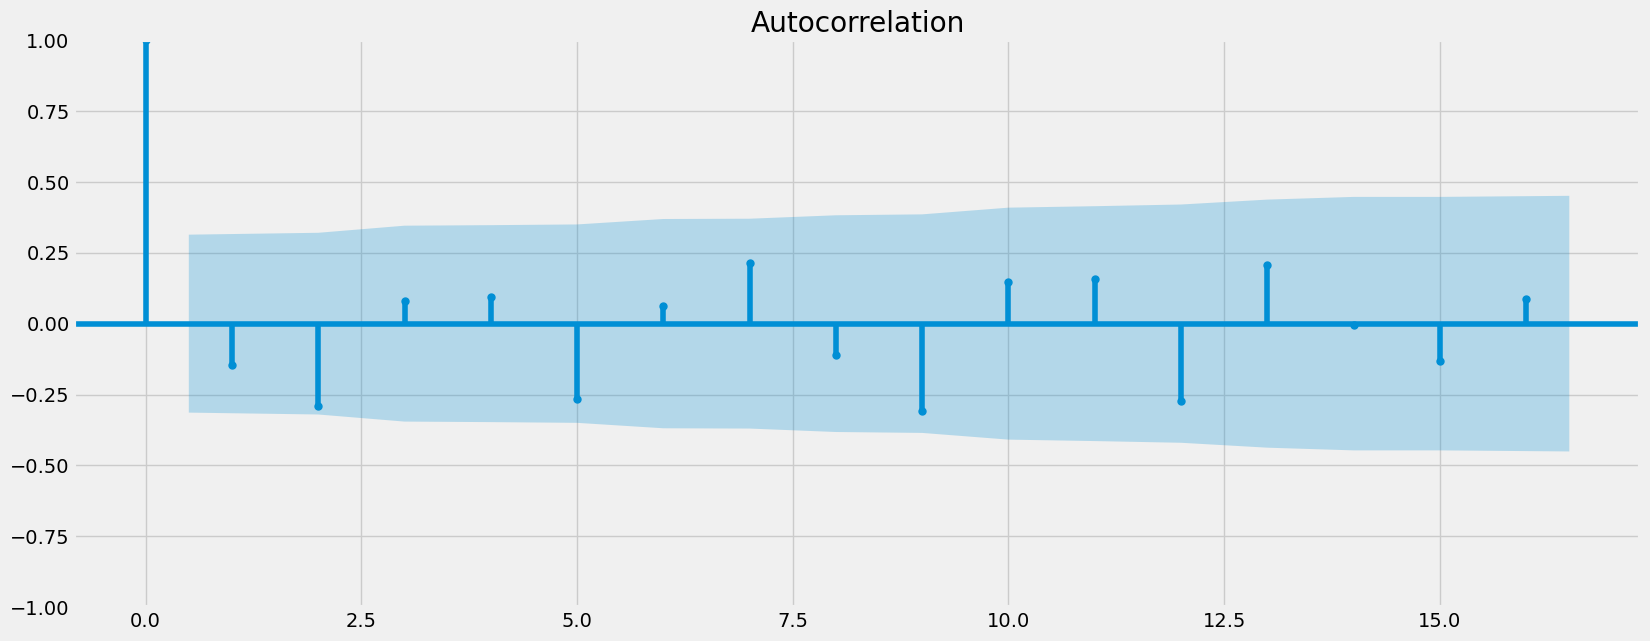

In [319]:
# Plot autocorrelation again

plot_acf(data_diff)
plt.show()

## **Interpretation:**

1. **Autocorrelation at Zero Lag**:
The autocorrelation at lag 0 is always 1 as a time series is perfectly correlated with itself at zero lag.

2. **Decay of Autocorrelation**:
- The plot shows a rapid decay of autocorrelation values that primarily fall within the confidence intervals, represented by the blue shaded area. This suggests that beyond the first few lags, the autocorrelations are minimal and not statistically significant.
- The lack of significant lagged autocorrelation confirms that most serial dependencies have been removed, supporting stationarity.

3. **Significance Within Confidence Interval**:
- Autocorrelation values in subsequent lags are predominantly within the blue shaded area (confidence interval), indicating most autocorrelation coefficients are not statistically different from zero.
- Occasional spikes may exceed these intervals, but they are minimal and do not suggest strong correlation structures.

4. **Implication for Modeling**:
With mostly non-significant autocorrelation after the first lag or so, the data likely doesn't require complex model structures to account for dependencies. Simpler models without needing extensive autoregressive components may suffice.


## **Conclusion:**

This autocorrelation plot validates the attainment of stationarity in the unemployment data, which aligns with the previously observed Dickey-Fuller test results. It highlights that after stationarizing, the series has effectively minimized or removed serial dependencies, thus rendering it suitable for reliable application of statistical models or econometric forecasting techniques that assume stationary inputs.